In [616]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [617]:
data_file1 = "raw_data/city_data.csv"
data_file2 = "raw_data/ride_data.csv"

In [618]:
file_df1 = pd.read_csv(data_file1)
file_df2 = pd.read_csv(data_file2)
file_df1.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [619]:
# Merge our two data frames together
combined_rides_df = pd.merge(file_df2, file_df1, on="city")
combined_rides_df.head()
#print(len(combined_rides_df))

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [620]:
# Using GroupBy in order to separate the data into fields according to "city" values
grouped_city_rides = combined_rides_df.groupby(['city'])
#print(grouped_city_rides.head())

# !!#Find the Average fare per city:
# !!avg_fare_per_city = grouped_city_rides["ride_id"].mean()

# !!#Find Total Number of Rides per City:
# !!num_rides_per_city = grouped_city_rides["ride_id"].count()
# !!#print("Rides in the cities:\n" + str(num_rides_per_city))

# !!#Find Total Number of Drivers per City:
# !!num_drivers_per_city = grouped_city_rides["driver_count"].value_counts()
# !!#print(num_drivers_per_city)

urban_cities_df = combined_rides_df[combined_rides_df["type"] == "Urban"]

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_cities_df = combined_rides_df[combined_rides_df["type"] == "Suburban"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_cities_df = combined_rides_df[combined_rides_df["type"] == "Urban"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#---------------------------------------------------------
# GROUP BY CITY TYPES 
#-------------------------------

#Group the merged data by city type: 
grouped_city_type = combined_rides_df.groupby(['type'])
#print(grouped_city_type.tail(20))
#print(grouped_city_type["driver_count"].value_counts())

# *rural = []
# *urban = []
# *suburban = []

#* for val, cnt in grouped_city_type["driver_count"].value_counts().iteritems():
#*     if val[0] == "Rural":
#*         rural.append(cnt)
#*     elif val[0] == "Urban":
#*         urban.append(cnt )
#*     elif val[0] == "Suburban":
#*         suburban.append(cnt)
    
#* print("Rural: " + str(rural))
#* print("Urban: " + str(urban))
#* print("Suburban: " + str(suburban))   

#==============================================================================
# for val, cnt in grouped_city_type["driver_count"].value_counts().iteritems():
#     if val[0] == "Rural":
#         rural.append(val[1] * 3)
#     elif val[0] == "Urban":
#         urban.append(val[1] * 3)
#     elif val[0] == "Suburban":
#         suburban.append(val[1] * 3)
    
# print("Rural: " + str(rural))
# print("Urban: " + str(urban))
# print("Suburban: " + str(suburban))     
    #driver_count_list.append(val[1])
#---------------------------------------------------------

# THE FOLLOWING STATEMENTS ARE NOT NEEDED AFTER THE ABOVE CHANGES*****
# The following statement is to check how many times a city name is repeated in the dataframe:
#print(grouped_city_rides["city"].value_counts())

driver_count_list = []
for val, cnt in grouped_city_rides["driver_count"].value_counts().iteritems():
    driver_count_list.append(val[1])

#print(driver_count_list)

city_type_color = []
for val, cnt in grouped_city_rides["type"].value_counts().iteritems():
    city_type_color.append(val[1])
#print(city_type_color)


In [621]:

#colors = ["lightblue", "gold", "coral"]


In [622]:
# plt.xlim(0, 50)
# plt.ylim(0, 50)

In [623]:
#print(avg_fare_per_city)

In [672]:
print(rural)
plt.scatter(x = rural_ride_count,
            y = rural_avg_fare,
            s = rural_driver_count * 10,
            c = "gold",
            marker="o", edgecolors="black",
            label = "Rural",
            alpha = 0.75)

# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($) Per City")
# plt.title("Pyber Ride Sharing Data")
# plt.legend(loc='best')
# plt.show()

[48, 25, 19, 17, 7, 4, 4, 1]


In [673]:
plt.scatter(x = suburban_ride_count,
            y = suburban_avg_fare,
            s = suburban_driver_count * 10,
            c = 'lightblue',
            marker="o", edgecolors="black",
            label = "Suburban",
            alpha = 0.75)

# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($) Per City")
# plt.title("Pyber Ride Sharing Data")
# plt.legend(loc='best')
# plt.show()

In [674]:
plt.scatter(x = urban_ride_count,
            y = urban_avg_fare,
            s = urban_driver_count * 10,
            c = 'coral',
            marker="o", edgecolors="black",
            label = "Urban",
            alpha = 0.75)



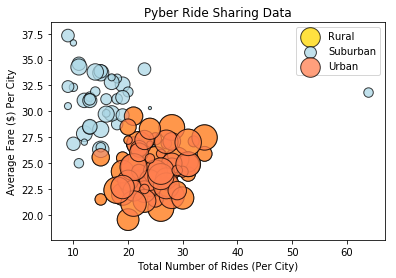

In [675]:
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) Per City")
plt.title("Pyber Ride Sharing Data")
plt.legend(loc='best')
plt.show()

In [645]:
# % of Total Fares by City Type
#-------------------------------

#Group the merged data by city type: ******* groupby needed?
grouped_city_type = combined_rides_df.groupby(['type'])
print(grouped_city_type)


In [646]:
#total_fare of each type of city:
total_fare = grouped_city_type['fare'].sum()

sum_fare = total_fare["Rural"] + total_fare["Suburban"] + total_fare["Urban"]
print(total_fare)
pcent_fare = total_fare/sum_fare *100

print(pcent_fare)

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64
type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64


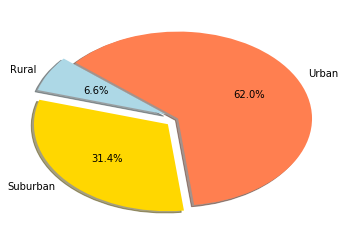

In [647]:
explode = (0.1,0.1,0)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(pcent_fare, explode=explode, labels=pcent_fare.keys() , colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
#plt.axis("equal")
plt.show()

In [648]:
# % of Total Rides by City Type
#-------------------------------

#total rides of each type of city:
total_rides = grouped_city_type['ride_id'].count()
total_rides

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [649]:
#Calculate percent of rides per city type
sum_rides = total_rides["Rural"] + total_rides["Suburban"] + total_rides["Urban"]
print(sum_rides)
pcent_rides = total_rides/sum_rides *100

print(pcent_rides)

2407
type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: ride_id, dtype: float64


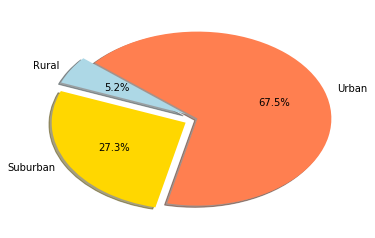

In [650]:
# Now plot the chart based on percent rides:

explode = (0.1,0.1,0)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(pcent_rides, explode=explode, labels=pcent_rides.keys() , colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [651]:
# % of Total Drivers by City Type

#Find Total Number of Drivers per City:
total_drivers = grouped_city_type["driver_count"].sum()
print(total_drivers)


type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64


In [652]:
#Calculate percent of drivers per city type
sum_drivers = total_drivers["Rural"] + total_drivers["Suburban"] + total_drivers["Urban"]
print(sum_drivers)
pcent_drivers = total_drivers/sum_drivers *100

print(pcent_drivers)

74958
type
Rural        0.969876
Suburban    12.980602
Urban       86.049521
Name: driver_count, dtype: float64


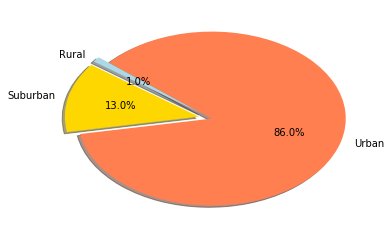

In [653]:
# Now plot the chart based on percent drivers:

explode = (0.1,0.1,0)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(pcent_drivers, explode=explode, labels=pcent_drivers.keys() , colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()